In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('../hashmatching/resnet50_vec512_hash96.csv', index_col=None)

In [3]:
df.sample(10)

,phone_actual,class_actual,distinct_actual,sample_actual,size_actual,angle_actual,side_actual,phone_predicted,class_predicted,distinct_predicted,sample_predicted,size_predicted,angle_predicted,side_predicted,index_actual,index_predicted,score
2870266,284,3,1,1,3,260,1,200,2,1,1,2,360,1,10,29,0.639034
1289470,179,2,1,1,2,200,1,342,3,1,1,3,360,1,12,23,0.449427
1397854,17,1,1,1,2,80,1,17,3,1,1,2,360,1,2,2,0.108303
3681528,331,3,1,1,2,20,1,456,3,1,1,2,360,1,4,5,0.391283
927815,39,3,1,1,2,220,1,872,2,1,1,4,360,1,1,1,0.380778
3558743,87,1,1,1,3,80,1,103,1,1,1,3,360,1,2,14,0.767417
3224429,555,3,1,1,2,40,1,814,3,1,1,4,360,1,30,11,0.468597
2755184,460,3,1,1,3,60,1,747,1,1,1,2,360,1,7,19,0.775617
3880718,524,3,1,1,4,40,1,622,2,1,1,1,360,1,14,9,0.446255
3373002,85,2,1,1,2,220,1,387,1,1,1,2,360,1,11,1,0.803144


In [4]:
df.rename(columns = {'phone_actual':'class_actual1', 'class_actual': 'phone_actual1', 
                     'phone_predicted':'class_predicted1', 'class_predicted': 'phone_predicted1', }, inplace = True)
df.rename(columns = {'phone_actual1':'phone_actual', 'class_actual1': 'class_actual', 
                     'class_predicted1':'class_predicted', 'phone_predicted1': 'phone_predicted', }, inplace = True) 

In [5]:
df.sample(1)

,class_actual,phone_actual,distinct_actual,sample_actual,size_actual,angle_actual,side_actual,class_predicted,phone_predicted,distinct_predicted,sample_predicted,size_predicted,angle_predicted,side_predicted,index_actual,index_predicted,score
820368,426,2,1,1,3,40,1,654,2,1,3,2,360,1,9,3,0.656834


In [6]:
df.pivot_table(index=['class_actual', 'phone_actual', 'distinct_actual', 'sample_actual', 'size_actual', 'side_actual'], columns='angle_actual', aggfunc='size', fill_value=0)

angle_actual                                                                     20   \
class_actual phone_actual distinct_actual sample_actual size_actual side_actual        
1            1            1               1             4           1             35   
             2            1               1             4           1             50   
             3            1               1             4           1             31   
3            1            1               1             2           1             49   
                          2               1             2           1            137   
...                                                                              ...   
897          2            1               1             2           1             67   
             3            1               1             2           1             43   
898          1            1               1             2           1             74   
             2            1               1             2           1             47   
             3            1               1             2           1             45   

angle_actual                                                                     40   \
class_actual phone_actual distinct_actual sample_actual size_actual side_actual        
1            1            1               1             4           1             35   
             2            1               1             4           1             43   
             3            1               1             4           1             23   
3            1            1               1             2           1             46   
                          2               1             2           1            148   
...                                                                              ...   
897          2            1               1             2           1             69   
             3            1               1             2           1             27   
898          1            1               1             2           1             37   
             2            1               1             2           1             49   
             3            1               1             2           1             34   

angle_actual                                                                     60   \
class_actual phone_actual distinct_actual sample_actual size_actual side_actual        
1            1            1               1             4           1             35   
             2            1               1             4           1             29   
             3            1               1             4           1             35   
3            1            1               1             2           1             53   
                          2               1             2           1            138   
...                                                                              ...   
897          2            1               1             2           1             51   
             3            1               1             2           1             27   
898          1            1               1             2           1             70   
             2            1               1             2           1             35   
             3            1               1             2           1             43   

angle_actual                                                                     80   \
class_actual phone_actual distinct_actual sample_actual size_actual side_actual        
1            1            1               1             4           1             50   
             2            1               1             4           1             29   
             3            1               1             4           1             29   
3            1            1               1             2           1             52   
                          2          

In [7]:
df.groupby(['class_actual', 'distinct_actual', 'sample_actual']).size()

class_actual  distinct_actual  sample_actual
1             1                1                1773
3             1                1                1896
              2                1                3985
                               2                4150
4             1                1                2534
                                                ... 
894           1                1                7900
895           1                1                8790
896           1                1                4021
897           1                1                2324
898           1                1                2252
Length: 997, dtype: int64

In [31]:
df_u = df.set_index(['class_actual', 'distinct_actual', 'phone_actual', 'angle_actual'])

In [42]:
for ind in df_u.index.unique():
    df_s = df_u.loc[ind]
    
    df_piv = df_s.pivot_table(
        index=['class_actual', 'distinct_actual', 'phone_actual', 'angle_actual', 'class_predicted', 'distinct_predicted'], 
        columns='index_actual', 
        values='score', 
        fill_value=np.nan, 
        aggfunc=lambda x: [s for s in x]
    ).reset_index()
    
    scores_ravel = df_piv.score.to_numpy()
    indexes_ravel = df_piv.index_actual.to_numpy()
    scores = []
    max_len = max([len(s) for s in scores_ravel])
    for i, (index, score) in enumerate(zip(indexes_ravel, scores_ravel)):
        scores_insert = np.zeros(max_len, dtype=np.float32)
        scores_insert[:len(score)] = sorted(score, reverse=True)
        scores.append(scores_insert)
    scores = np.asarray(scores).T
    
    predicted = df_piv.class_predicted.to_numpy()
    
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    #axes.set_ylim([0,1])
    ind = list(range(len(predicted)))

    for index, score in enumerate(scores):
        if index == 0:
            print(len(ind), len(scores[index]))
            plt.bar(x=ind, height=scores[index], width=0.4)
        else:
            plt.bar(x=ind, height=scores[index], bottom=scores[index-1], width=0.4)
    plt.xticks(ind, predicted)
    plt.show()
    
    break

<ipython-input-42-cf58094e05b1>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_s = df_u.loc[ind]


AttributeError: 'DataFrame' object has no attribute 'score'

In [41]:
df_s.reset_index().sample(10)
df_s

sample_actual  \
class_actual distinct_actual phone_actual angle_actual                  
5            1               3            60                        2   
                                          60                        2   
                                          60                        2   
                                          60                        1   
                                          60                        1   
...                                                               ...   
                                          60                        2   
                                          60                        2   
                                          60                        2   
                                          60                        2   
                                          60                        2   

                                                        size_actual  \
class_actual distinct_actual phone_actual angle_actual                
5            1               3            60                      2   
                                          60                      2   
                                          60                      2   
                                          60                      2   
                                          60                      2   
...                                                             ...   
                                          60                      2   
                                          60                      2   
                                          60                      2   
                                          60                      2   
                                          60                      2   

                                                        side_actual  \
class_actual distinct_actual phone_actual angle_actual                
5            1               3            60                      1   
                                          60                      1   
                                          60                      1   
                                          60                      1   
                                          60                      1   
...                                                             ...   
                                          60                      1   
                                          60                      1   
                                          60                      1   
                                          60                      1   
                                          60                      1   

                                                        class_predicted  \
class_actual distinct_actual phone_actual angle_actual                    
5            1               3            60                          5   
                                          60                          5   
                                          60                        690   
                                          60                          5   
                                          60                          5   
...                                                                 ...   
                                          60                        239   
                                          60                         69   
                                          60                        724   
                                          60                         69   
                                          60                        655   

                                                        phone_predicted  \
class_actual distinct_actual phone_actual angle_actual                    
5            1               3            60                          3   
                                          60             

In [9]:
df_c1_m = df_c1.loc[df_c1.groupby(['phone_actual', 'angle_actual', 'index_actual']).score.idxmin()]

In [10]:
df_c1_m.angle_actual.value_counts()

240    24
20     23
100    23
160    22
320    22
340    22
260    21
140    21
300    21
180    21
220    20
280    20
120    20
80     20
200    19
40     19
60     18
Name: angle_actual, dtype: int64

In [11]:
df_c1_s = df_c1[(df_c1.phone_actual == 1) & (df_c1.angle_actual == 20)]

In [12]:
df_c1_s

,class_actual,phone_actual,distinct_actual,sample_actual,size_actual,angle_actual,side_actual,class_predicted,phone_predicted,distinct_predicted,sample_predicted,size_predicted,angle_predicted,side_predicted,index_actual,index_predicted,score
123072,1,1,1,1,4,20,1,1,1,1,1,4,360,1,1,1,0.031153
123073,1,1,1,1,4,20,1,192,1,1,1,3,360,1,1,1,0.049280
123074,1,1,1,1,4,20,1,1,2,1,1,4,360,1,1,1,0.072839
123075,1,1,1,1,4,20,1,1,3,1,1,4,360,1,1,1,0.119980
826003,1,1,1,1,4,20,1,1,1,1,1,4,360,1,4,3,0.046551
826004,1,1,1,1,4,20,1,192,1,1,1,3,360,1,4,3,0.068748
826005,1,1,1,1,4,20,1,192,2,1,1,3,360,1,4,4,0.073704
826006,1,1,1,1,4,20,1,1,2,1,1,4,360,1,4,3,0.084014
826007,1,1,1,1,4,20,1,1,3,1,1,4,360,1,4,4,0.107772
1175505,1,1,1,1,4,20,1,192,2,1,1,3,360,1,2,2,0.051339


In [260]:
df_piv_all = df.pivot_table(index=['class_actual', 'distinct_actual', 'phone_actual', 'angle_actual', 'class_predicted', 'distinct_predicted'], columns='index_actual', values='score', aggfunc=lambda x: [s for s in x])

In [261]:
df_piv_all.reset_index()

index_actual,class_actual,distinct_actual,phone_actual,angle_actual,class_predicted,distinct_predicted,1,2,3,4,...,89,90,91,92,93,94,95,96,97,98
0,1,1,1,20,1,1,"[0.03115289040991391, 0.07283923833297995, 0.1...",NaN,NaN,"[0.04655061464880311, 0.08401394017167921, 0.1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,20,41,1,NaN,NaN,[0.7506125986900011],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,20,79,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,20,192,1,[0.049280076087785334],[0.051338791646125065],[0.10599696427547682],"[0.06874787156687888, 0.07370419210159182]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,20,202,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526399,898,1,3,340,740,1,NaN,NaN,[0.1644372414825924],[0.384667597686288],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526400,898,1,3,340,828,1,NaN,NaN,[0.24292305589322566],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526401,898,1,3,340,844,1,NaN,[0.056412249484671474],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526402,898,1,3,340,873,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df_piv = pd.pivot_table(data=df_exp, index=df_exp.class_predicted, fill_value=np.nan, aggfunc=lambda x: [s for s in x]).reset_index()
# df_piv.columns = pd.Index([f"{e[0]}_{e[1]}" for e in df_piv.columns.tolist() if len(e) > 1])

In [256]:
df_piv_min = pd.pivot_table(data=df_exp, index=df_exp.class_predicted, fill_value=np.nan, aggfunc=np.min).reset_index()

In [257]:
df_piv_min

,class_predicted,index_actual,score
0,1,1,0.031153
1,41,3,0.750613
2,79,6,0.710974
3,192,1,0.049280
4,202,7,0.801209
5,222,2,0.624644
6,238,7,0.811373
7,246,7,0.799777
8,299,6,0.711091
9,352,7,0.804123


In [215]:
df_piv

,class_predicted,index_actual,score
0,1,"[1, 1, 1, 4, 4, 4, 5, 5]","[0.03115289040991391, 0.07283923833297995, 0.1..."
1,41,[3],[0.7506125986900011]
2,79,[6],[0.7109742037171043]
3,192,"[1, 4, 4, 2, 7, 3]","[0.049280076087785334, 0.06874787156687888, 0...."
4,202,[7],[0.8012091557643755]
5,222,"[2, 2]","[0.6246442033092554, 0.6336319287219949]"
6,238,[7],[0.8113731540189671]
7,246,[7],[0.7997771422645344]
8,299,[6],[0.7110911555525943]
9,352,[7],[0.8041230365395312]


0 [0.03115289040991391, 0, 0, 0.049280076087785334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [0.07283923833297995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [0.1199802620729148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 0, 0.051338791646125065, 0, 0.6246442033092554, 0, 0, 0, 0, 0, 0, 0, 0.6223686524733685, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 0, 0, 0, 0.6336319287219949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 [0, 0.7506125986900011, 0, 0.10599696427547682, 0, 0, 0, 0, 0, 0, 0, 0.4291555245459237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 [0.04655061464880311, 0, 0, 0.06874787156687888, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 [0.08401394017167921, 0, 0, 0.07370419210159182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 [0.10777224024524404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 [0.08680540070835423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7005982285242329, 0, 

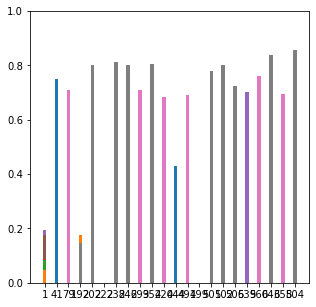

In [208]:
predicted = df_piv.class_predicted.to_numpy()
# descriptors = list(filter(lambda x: x.startswith('score'), df_piv.columns))
plt.figure(figsize=(5, 5))
axes = plt.gca()
#axes.set_ylim([0,1])
ind = list(range(len(predicted)))

desc_values = []
for 
for index, descriptor in enumerate(descriptors):
    
    #     ax = axes[index]
    values = df_piv[descriptor].to_numpy()
    s = len(max(values, key=lambda x: len(x) if not np.isnan(x).all() else 0))
    for i in range(s):

        
        values_flatten = [v[i] if type(v) is list and len(v) > i else 0 for v in values]
        print(index, values_flatten)
        if index >= 2:
            desc_values.append(values_flatten)
            
        
            if len(desc_values) == 1:
                plt.bar(x=ind, height=desc_values[-1], width=0.3)
            else:
                plt.bar(x=ind, height=desc_values[-1], bottom=desc_values[-2], width=0.3)
plt.xticks(ind, predicted)
plt.show()
        
        
#         max_score = max([max(s) for s in desc_values])
# for d in desc_values:
#     print(d)

#     break
    # ax.bar()

In [251]:
scores_ravel = df_piv.score.to_numpy()
indexes_ravel = df_piv.index_actual.to_numpy()
scores = []
max_len = max([len(s) for s in scores_ravel])
for i, (index, score) in enumerate(zip(indexes_ravel, scores_ravel)):
    scores_insert = np.zeros(max_len, dtype=np.float32)
    print(index)
    scores_insert[:len(score)] = sorted(score, reverse=True)
    scores.append(scores_insert)
scores = np.asarray(scores).T

[1, 1, 1, 4, 4, 4, 5, 5]
[3]
[6]
[1, 4, 4, 2, 7, 3]
[7]
[2, 2]
[7]
[7]
[6]
[7]
[6]
[3]
[6]
[2]
[7]
[7]
[7]
[5]
[6]
[7]
[6]
[7]


22 22


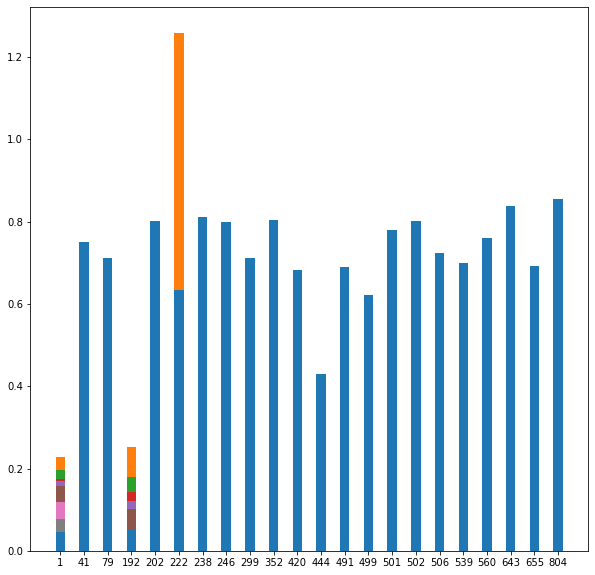

In [249]:
predicted = df_piv.class_predicted.to_numpy()
plt.figure(figsize=(10, 10))
axes = plt.gca()
#axes.set_ylim([0,1])
ind = list(range(len(predicted)))

for index, score in enumerate(scores):
    if index == 0:
        print(len(ind), len(scores[index]))
        plt.bar(x=ind, height=scores[index], width=0.4)
    else:
        plt.bar(x=ind, height=scores[index], bottom=scores[index-1], width=0.4)
plt.xticks(ind, predicted)
plt.show()
        
        
#         max_score = max([max(s) for s in desc_values])
# for d in desc_values:
#     print(d)

#     break
    # ax.bar()